# COGS 188 - Final Project

# PacMan Reinforcement Learning

## Group members

- Austin Blanco
- Yifei Du
- Alvin Xiao

# Abstract 
This project aims to develop and compare reinforcement learning (RL) methods—specifically Q-learning and Deep RL—to train an intelligent agent for Pac-Man. We use the Pac-Man game environment, where the “data” comprises observable states (positions of Pac-Man, ghosts, and pellets) and discrete actions (move up, down, left, right, or stay). Each state transition yields a measurable reward (e.g., +1 for eating a pellet, +10 for eating a ghost, 0 otherwise), which the agent uses to learn an optimal policy that maximizes cumulative score. We will implement both a tabular Q-learning approach (suitable for smaller mazes) and a deep reinforcement learning method (using a neural network to approximate Q-values) to handle larger or more complex scenarios. Performance will be assessed by tracking total reward, survival time, and win rate across multiple episodes. Additionally, we plan to test the agents on new or modified mazes, measuring their ability to generalize under varying conditions. By systematically evaluating these algorithms, we aim to identify the most effective solution for real-time decision-making in Pac-Man and demonstrate how different RL strategies perform in a dynamic, adversarial environment.

# Background

### Reinforcement Learning in Pacman
Reinforcement learning (RL) is a branch of machine learning in which an agent learns to performs actions in an environment in order to maximize a cumulative reward <a name="suttonnote"></a>[<sup>[4]</sup>](#sutton&barto). The agent iteratively explores the environment, observing the outcomes, rewards and penalties, of its actions. Over time, it refines a policy, which specifies the actions to take in each state to optimize long term return. Early RL methods, such as Q-learning and SARSA, rely on tabular representations of the value function Q(s,a) to estimate how desirable each action a is in a given state s. These approaches are effective in smaller domans, but become less reliable as the state space grows. This limitation has led to the integration of deep learning, more specifically Deep Reinforcement Learning (DRL)<a name="Arulkumarannote"></a>[<sup>[1]</sup>](#arulkamaran). DRL leverages neural networks to approximate the value function or policy, allowing the agent to handle high-dimesional states <a name="mnihnote"></a>[<sup>[1]</sup>](#mnih).

Pac-Man is a classic arcade game featuring a grid-based maze. The agent (Pac-Man) navigates the maze to collect pellets while avoiding or chasing four ghosts. This environment offers RL challenges:
- Discrete Action Space: Pac-Man can move in five different directions (up, down, left, right, stay)
- Reward Structure: The game provides immediate rewards (pellets), high-value rewards (power pellets), and strong penalties (losing a life).
- Adversial Dynamics: Ghosts actively pursue Pac-Man
Because of these properties, Pac-Man is an ideal environment setup for RL. 

### Prior Work

Pac-Man has been a popular benchmark for artificial intelligence (AI) research since the 1980s, initially explored through rule-based or search-based methods (e.g., depth-first search and A*) and later through classical reinforcement learning (RL). Early RL applications often employed tabular Q-learning on simplified mazes, where state representations included Pac-Man’s coordinates, ghost positions, and pellet locations. However, this approach suffered from a combinatorial explosion in larger or more complex layouts. To reduce the dimensionality, some researchers employed hand-engineered features—like “ghost proximity” or “pellet distance”—rather than storing value estimates for every possible state. Around the same time, Ms. Pac-Man emerged as a competition environment <a name="lucasnote"></a>[<sup>[2]</sup>](#lucas), prompting novel strategies such as neuroevolution and hybrid RL techniques, which further demonstrated the need for more scalable, generalizable methods

As deep learning gained traction, Deep Q-Networks (DQN) were introduced, showing human-level control in various Atari games <a name="mnihnote"></a>[<sup>[3]</sup>](#mnih). This success naturally extended to Pac-Man, where deep RL agents learned to approximate Q-values using convolutional neural networks, bypassing manual feature engineering. The advent of DQN variants like Double DQN, Prioritized Experience Replay, and policy-gradient methods further improved stability and performance. 

### Challenges

Pac-Man is simpler than real-world environments, but still offers many challenges:
- Exponential State Space: The number of possible states grows quickly with the maze size, the postions of Pac-Man, number of ghosts, and remaining pellets.
- Sparse Rewards: Collecting pellets is straightforward, but learning optimal strategies like chasing ghosts with higher power-pellet rewards can be challenging.
- Exploration vs Exploitation: Pac-Man may be drawn to safer paths, but effective policies sometimes require risk taking like high-value power pellets.
- Computational Cost: DRL can be computationally expensive, which will require careful hyperparameter tuning and potentially large-scale training to converge to optimal solutions <a name="Arulkumarannote"></a>[<sup>[1]</sup>](#arulkamaran)

# Problem Statement

This project aims to build an intelligent agent that learns an optimal policy to play Pac-Man, maximizing score by collecting pellets while avoiding or chasing ghosts. The goal is to maximize the expected cumulative reward, where each pellet contributes to the score and collisions with ghosts incur penalties or game termination. The problem is quantifiable because it can be modeled as a Markov Decision Process (MDP): each state (positions of Pac-Man, ghosts, and remaining pellets) transitions to a new state with a probabilistic reward. It is measurable through performance metrics like average score, survival time, and win rate, all of which can be tracked across multiple episodes. Finally, it is replicable since Pac-Man’s environment, action space, and reward functions can be consistently re-initialized or varied in a controlled manner

# Proposed Solution

In order to solve this problem as a MDP, we can compare Q-learning and deep reinforcement learning approaches to help solve our problem. Our set of states reflect different possible snapshots of the game; for example, each different position of Pacman and all the ghosts can be a different state, each dot and whether it has been eaten or not can also be information about a state, and so on. Our action space is discrete and can be broken down into directional movements of stay, up, down, left, and right.


### Temporal Difference Off-Policy Learning

For this algorithm:
- State Space: $S = ((x, y)_{pacman}, (x, y)_{nearest pellet}, (x, y)_{nearest ghost})$
- Action Space: $\{0: NOOP, 1: UP, 2: RIGHT, 3: LEFT, 4: DOWN\}$
- Transition Function: If Pacman moves up, right, left, or down, then Pacman's position changes. As Pacman's position changes, the distance from Pacman to the nearest pellet also changes and may be a different pellet. As Pacman's position changes, the distance from Pacman to the nearest ghost may also change, depending on the path the ghost is taking, and also may be a different ghost if another ghost comes closer.

The update policy works as follows:  $Q(s,a) \gets Q(s,a) + \alpha \bigl[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \bigr]$

The observation that we get from the environment is an RGB image of Pacman, the ghosts, the map, and the pellets. With all that information being presented in the image, we can implement feature extraction and represent a state as a tuple of Pacman's position on the map, the nearest pellet to Pacman, and the nearest ghost to Pacman. This reduces a lot of the dimensionality from the original image as we only keep key components of the state. We can use the OpenCV library to help process the image, identifying the right colors (matching the objects we want in the image) and extracting those elements.

We can also optimize the agent's growth by configuring the reward system. We can experiment with which of the agent's actions should be either rewarded or penalized even further. There are 3 modifications we can make to the current reward system. First, we can increase the reward for eating a pellet to encourage the agent collecting more pellets. Then, we can penalize the agent if the agent stays in the same position, to avoid getting stuck at walls. Finally we can calculate the distance from Pacman to the nearest ghost at each step, and if that distance increases in the next step, suggesting Pacman runs farther away from the ghost, then we give a small reward to the agent. This would encourage the agent to run away from the ghosts and avoid ending the round too early.

### SARSA On-Policy Learning  

For this algorithm: 
- State Space: $S = ((x, y)_{pacman}, (x, y)_{nearest pellet})$
- Action Space: $\{0: NOOP, 1: UP, 2: RIGHT, 3: LEFT, 4: DOWN\}$
- Transition Function: If Pacman moves up, right, left, or down, then Pacman's position changes. As Pacman's position changes, the distance to nearest pellet also changes. 

SARSA works by updating the (state, action) of Q-table by:
$Q(s,a) \gets Q(s,a) + \alpha \Big[ r + \gamma Q(s',a') - Q(s,a) \Big]$

For the SARSA implementation, we kept the state space simple by only representing the coordinates of the pacman and the nearest pellet to help reduce dimensionality as extracting too many features will make the observation space too big to represent accurately with the gymnasium environment. We can use the OpenCV library to help process the image once again, identifying the right colors to extract the wanted elements. 

We can also restructure the reward system once again by adding a bonus anytime the Pacman's action moved it closer to the closest pellet extracted. This is simple restructing that should encourage the PacMan to move closer and eat pellets. A image of the feature extraction can be see down below. The red dot represents PacMan's location and the green dot represents the closest food in the far left image.

### DQN Learning

For this algorithm:
- State Space: $S$ = Preprocessed grayscale frames of the game environment, represented as an 84×84 image.
- Action Space: $A = {0: NOOP, 1: UP, 2:RIGHT, 3: LEFT, 4: DOWN}$
- Transition Function: Each action changes Pac-Man's position and may affect the pellet and ghost locations. The enviornment updates based on predetermined game mechanics.

DQN updates its policy by minimizing its loss: $L(\theta) = \frac{1}{N}\sum_{j=1}^{N}\Bigl(y_j - Q(s_j,a_j;\theta)\Bigr)^2$

To improve the performance, we use a Target Network, which is updated gradually using a soft update class. The policy network is optimized using Huber loss (SmoothL1Loss), which help reduces sensitivity to outliers. The training process follows an epsilon greedy strategy with an exponential decay to balance exploration and exploitation. We also use a replay buffer that stores past experiences and samples large batches to stabilize training.

We can optimize the game using convolutional neural network (CNN), which extracts spatial features from the preprocessed game frames. the network consists of multiple convolutional layers that reduces the input dimention while capturing important patterns within the game, such as Pac-Man's position, the pellets, and the ghost's position. the output would then be flattened and passed through fully connected layers to compute the Q-values for each possible action. Allowing the agent to learn based on past experiences.

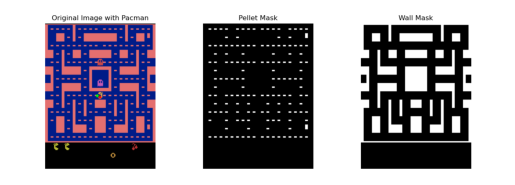

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'Reward Plots/featureExtractor.png'
img = mpimg.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Evaluation Metrics

In order to quantify the performance of our algorithms, we want to see how well the agent learns over a range of episodes. We can measure the total reward accumulated from each episode, and then plot those rewards in a graph. By doing so, we can measure how effectively our agent is learning, and also observe if there is any convergence. However, in each of our approaches the reward systems differ from one another due to modifications so we can't directly compare the flat reward amounts between our approaches. Instead, we can compare the trends and potentially determine which agent seems more stable in learning the optimal policy.

# Results

### SARSA On-Policy Learning Performance

The agent showed minimal signs of learning after training, with the average reward slightly increasing over time. However, with the simple feature extraction of the PacMan's coordinates and the closest pellet, the state space is under represented in the observation space. Even with hyperparameter tuning, there was not much change between the different combinations of hyperparameters. Even with more episodes, it is unlikely that the PacMan learns a good policy as a key feature was never represented in this implementation which was the location of the ghosts. However, in the section, TD Off-Policy Learning, a richer feature extraction was explored. The reward restructing was the biggest influence for the PacMan's actions. By implementing the following code the PacMan was able to keep moving towards the pellets, although not well at times. It works by finding the max betwen 0 and difference between the previous distance of the closest pellet and the current distance of the closest pellet. This is the multipled by a bonus_factor that was kept constant, which a hyperparameter that could be tuned. 
```python
def compute_bonus_reward(original_reward, prev_distance, current_distance, bonus_factor=1.0):
    bonus = bonus_factor * max(0, prev_distance - current_distance)
    return original_reward + bonus
```

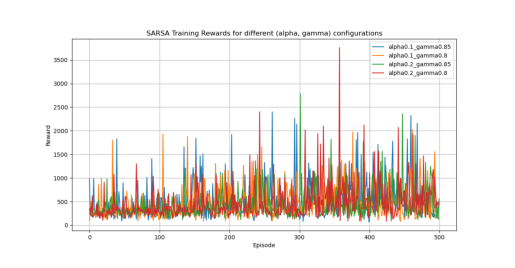

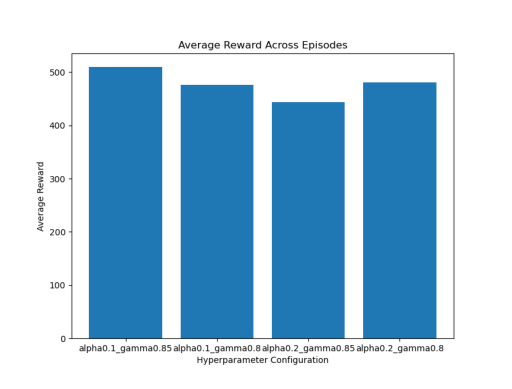

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'Reward Plots/reward_plot_6.png'
img = mpimg.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()
path2 = 'Reward Plots/average_reward_plot_4.png'
img2 = mpimg.imread(path2)
plt.imshow(img2)
plt.axis('off')
plt.show()

### TD Off-Policy Learning Performance

The agent does show signs of learning after training, where the average reward has increased over time. However, overall the agent does not seem to perform the best when using Q-learning with the Pacman environment. While Q-learning performs better with smaller state spaces, reducing the size of the state space by too much can lose valuable information. Thus, even after our representation tries to preserve the key positions of entities on the map, it is still too large for the agent to learn optimal paths. Another factor to the variability in the plot below is due to the stochasticity of the ghosts. As their paths change, it becomes difficult for the agent to learn a pattern when it already is struggling to perform with the Q-table.

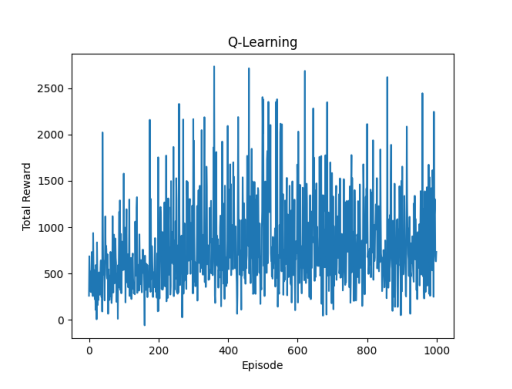

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'Reward Plots/td_q_learning_plot.png'
img = mpimg.imread(path)

plt.imshow(img)
plt.axis('off')
plt.show()

What seemed to influence the agent's behavior the most during this training was the reward modifications we set up for this method. For this particular algorithm, we used the flat values below, chosen by running different reward/penalty amounts and seeing which performed best. This can be observed in the video for TD learning in the videos folder.

```python
if reward == 10:
    reward += 5

if pacman_pos == prev_pos:
    reward -= 5

curr_distance = np.linalg.norm(np.array(pacman_pos) - np.array(closest_ghost))
if curr_distance > prev_distance:
    reward += 3
```

### DQN Performance

We actually tried two different DQN methods, the first one shows some signs of learning, but did not have great results. The second one doesn't show much learning, but has a much better results. The second DQN has a much bigger batch size (512) compared to the first one (64), more frequent updates with a smaller tao, and a consistent exponential decay function. A factor to the first one's lowered rewards could be a result of it punishing the enviornment when the reward isn't positive. But the reason why both DQN didn't do too well is very likely due to our limited episodes and time to train the model.

This is the result of the first DQN training


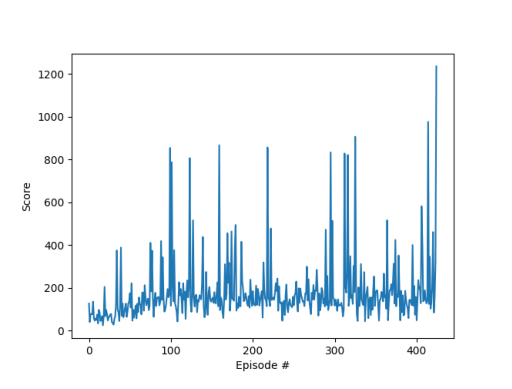

This is the result of the second DQN training


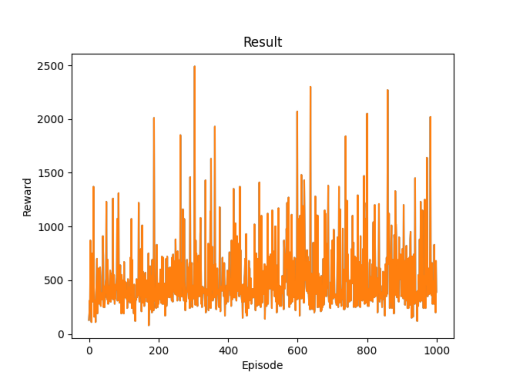

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print('This is the result of the first DQN training')
path1 = 'Reward Plots/dqn_training_scores.png'
img = mpimg.imread(path1)

plt.imshow(img)
plt.axis('off')
plt.show()

print('This is the result of the second DQN training')
path2 = 'Reward Plots/rewards_plot_dqn.png'
img2 = mpimg.imread(path2)

plt.imshow(img2)
plt.axis('off')
plt.show()


##### (Note: All recordings can be found in the video folder)

# Discussion

### Interpreting the Result

The main takeaway from our experiment is that none of the three approaches—SARSA, Q-Learning, or DQN—achieved consistently strong results, as all models demonstrated highly variable performance. While all models showed some signs of learning, none developed a reliably optimal policy. However, the DQN model's performance is likely much lower than it should be, as the limited number of training episodes significantly constrained its performance.

- Feature extraction and representation were key factors in the effectiveness of SARSA and Q-Learning. A state representation consisting only of Pac-Man's position and its nearest pellets did not capture enough information for the model to improve efficiently. Q-Learning performed slightly better than SARSA but remained very unstable, likely due to the complexity of the environment.

- Reward structuring had a strong influence on agent behavior. In both SARSA and Q-Learning, tuning the reward function helped guide learning, but the spikes in the graph still indicate that the agent struggled to maintain a consistent policy.

- Training duration was the biggest limiting factor for DQN training. With significantly more episodes, both DQN models would likely show much better results. The current DQN implementation does not demonstrate promising results with its current episode size.


### Limitations

##### SARSA On-Policy
  
SARSA learns the value of the policy it actually following (including its exploration). This can lead to more conservative policies that avoid risky moves, resulting in suboptimal exploration which was observed where the agent usually explored paths that it had already taken. The feature extraction was the biggest limitation for SARSA. The gymanasium environment creates a very large state space for tabular methods like SARSA making it challenging for the agent to efficiently learn the best policy. The feature extraction of only the agents location and the closest pellet under represented the complex nature of the environment.

##### Q-Learning Off-Policy

Q-Learning can sometimes overestimate the action values due to the maximization step in the update leading to instability. Also, similar to SARSA, since Q-Learning is a tabular method, feature extraction becomes challenging as balancing the tradeoffs between state representation and the number of states is crucial. While the feature extraction used in Q-Learning was richer compared to the feature extraction in SARSA, the agent still struggled to learn an optimal policy as the state space grew with the number of features being extracted. 

##### DQN

The biggest limitation when working with a DQN is that it generally requires a large number of training samples (episodes) to learn an optimal policy, which is computationally expensive, especially on complex environment like PacMan. There are many studies that highlight DQN working for environments like PacMan, but episodes usually range in the tens of thousands, which is outside the realm of our current resources and time. Also, neural network architectures are sensitive to hyperparameters making it challenging to find a robust set of hyperparameters for dynamic environments like PacMan

### Future work
These are a list of things we would like to try to make our models better:
- Implementing a more advanced feature extraction techniques without drastically increasing the size of the state space would greatly improve our SARSA model.
- Try to use a Double Q-Learning model to help address the overestimation with 2 independent Q-networks.
- Optimize hyperparameters and have a much bigger episode size for DQN.


### Ethics & Privacy

Our project mainly focuses on developing and comparing AI's with different machine learning algorithms, but there are some ethical consequences we must consider. One concern is that the AI agent may develop exploitative strategies if they were to find a loophold in the reward system, they might try to stall and play as safe as possible instead of finding the best way to get a high score, or manipulate game mechanics and bug out the game. We will adjust the reward system and take the game's bugs into consideration when creating our machine learning models to mitigate these issues.

We will also take fairness into consideration when comparing different machine learning methods. Each different AI will be tested under identical conditions (maps, difficulty, etc.), ensuring that no AI has an advantage over another in our performance metrics. 

While Pac-Man is a clsoed enviornment, the AI concepts we develop could apply to real-world situations, we will take this into consideration when we create our modelss so that we can avoid this as much as possible.

### Conclusion

In conclusion, our exploration of reinforcement learning methods gor PacMan highlights both the potential and challenges of applying SARSA, Q-Learning, and DQN to complex, high dimensional environments. While exploring both SARSA and Q-Learning, it became apparant how crucial feature extraction and reward shaping become when working with large state spaces. DQN, which leverages deep learning to approxiamte value functions from raw images, offers a powerful solution for high-dimensional input has shortcomings as it demands extensive training, careful tuning of hyperparameters, and significant computational resources to achieve stable performance. Overall, our results underscore the importance robust feature extraction and reward shaping to encourage effective exploration. Future work could focus on on integrating hybrid models and advanced exploration techniques to further enhance agent performance. 

# Footnotes
<a name="Arulkumarannote"></a>1: Arulkumaran, K., Deisenroth, M. P., Brundage, M., & Bharath, A. A. (2017). A Brief Survey of Deep Reinforcement Learning. IEEE Signal Processing Magazine, 34(6), 26–38.<br> 
<a name="lucasnote"></a>2: Lucas, S. M. (2007). Ms. Pac-Man competition. IEEE Symposium on Computational Intelligence and Games, 158–159. <br>
<a name="mnihnote"></a>3: Mnih, V., Kavukcuoglu, K., Silver, D., Rusu, A. A., Veness, J., Bellemare, M. G., … Hassabis, D. (2015). Human-level control through deep reinforcement learning. Nature, 518(7540), 529–533.<br>
<a name="suttonnote"></a>4: Sutton, R. S., & Barto, A. G. (2018). Reinforcement Learning: An Introduction (2nd ed.). MIT Press.

